In [1]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np
from scipy.linalg import expm

n=200
m=[4,5,7,9,10]
phi_lst = []
phi_av = []
lg = []
time = np.arange(0,20,0.05)

for i in range(5):
    G = nx.barabasi_albert_graph(n, m[i], seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m[i], seed=None)
    
    degrees = 2*G.number_of_edges()
    phi_av.append(degrees/len(G.nodes()))
    

    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions
    D, V = LA.eigh(L)
    
    phi_t = []
    for t in time :                             #Loop through times and decay each initial component
        Ht = expm(np.multiply(L,-t))
        phi_t.append(Ht.sum())
        
    phi_lst.append(phi_t)
    lg.append('Ave'+str(phi_av[i]))
     

ValueError: shapes (200,200) and (1,200) not aligned: 200 (dim 1) != 1 (dim 0)

In [4]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np
from scipy.linalg import expm

nr=150
p=[0.033, 0.043, 0.05,0.067,0.089]
phi_lstr = []
phi_avr = []

time = np.arange(0,20,0.05)

for i in range(5):
    G = nx.gnp_random_graph(nr, p[i], seed=None, directed=False)
    while (nx.is_connected(G)==False):
        G = nx.gnp_random_graph(nr, p[i], seed=None, directed=False)

    degrees = 2*G.number_of_edges()
    phi_avr.append(degrees/len(G.nodes()))
    

    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions

    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix

    phi_tr = []
    for t in time :                             #Loop through times and decay each initial component
        #D = np.diag(np.exp(np.multiply(D,-t)));
        H = expm(np.multiply(L,-t))
        phi_tr.append(H.sum())
        
    phi_lstr.append(phi_tr)

In [3]:
for i in range(5):
        plt.plot(time,[ e/max(phi_lst[i]) for e in phi_lst[i]],'-b')

for i in range(5):
        plt.plot(time,[ e/max(phi_lstr[i]) for e in phi_lstr[i]],'-g')
        
plt.ylabel('Heat content, $Q(t)$')
plt.xlabel('Time,t')         
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-ERheatcontent.eps', format='eps', dpi=1000)
plt.show()
print(phi_av)
print(phi_avr)

IndexError: list index out of range

In [5]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np
from scipy.linalg import expm

n=1000
m=[5,6,7,8,10]
phi_lst = []
phi_av = []
lg = []
av_lst=[]
time = np.arange(0,5,0.005)

for i in range(5):
    G = nx.barabasi_albert_graph(n, m[i], seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m[i], seed=None)
    
    degrees = 2*G.number_of_edges()
    phi_av.append(degrees/len(G.nodes()))
    
    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions
    D, V = LA.eigh(L)
  
    ln = len(D);
    alp_v = []
    phi_t = []
    av_t=[]
    for j in range(ln):
        vsum = V[:, j].sum()
        alp_v.append(pow(vsum,2))
        
    for t in time:
        s = 0
        av = 0
        for k in range(ln):
            ss = alp_v[k]*np.exp(-t*D[k])
            s = s+ ss
            av = av+(D[k]*ss)
        phi_t.append(s)
        av_t.append(-1*av)
        
    phi_lst.append(phi_t)
    av_lst.append(av_t)
    lg.append('Ave'+str(phi_av[i]))

In [6]:
nr=1000
p=[0.007,0.008,0.009,0.0095,0.01]
phi_lstr = []
phi_avr = []
lgr = []
av_lstr = []
time = np.arange(0,5,0.005)

for i in range(5):
    Gr = nx.gnp_random_graph(nr, p[i], seed=None, directed=False)
    while (nx.is_connected(Gr)==False):
        Gr = nx.gnp_random_graph(nr, p[i], seed=None, directed=False)
    
    degrees = 2*Gr.number_of_edges()
    phi_avr.append(degrees/len(Gr.nodes()))
    
    Lr = nx.normalized_laplacian_matrix(Gr).todense()   # to cater for no longrange interactions
    Dr, Vr = LA.eigh(Lr)
  
    lnr = len(Dr);
    alp_vr = []
    phi_tr = []
    av_tr = []
    for j in range(lnr):
        vsumr = Vr[:, j].sum()
        alp_vr.append(pow(vsumr,2))
        
    for t in time:
        s = 0
        av=0
        for k in range(lnr):
            ss = alp_vr[k]*np.exp(-t*Dr[k])
            s = s+ ss
            av = av+(Dr[k]*ss)
        phi_tr.append(s)
        av_tr.append(-1*av)
        
    phi_lstr.append(phi_tr)
    av_lstr.append(av_tr)
    lgr.append('Ave'+str(phi_avr[i]))

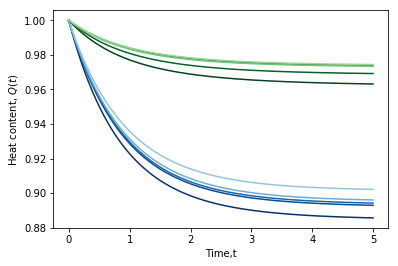

[9.95, 11.928, 13.902, 15.872, 19.8]
[7.158, 8.062, 9.01, 9.702, 9.836]


In [9]:
cmp = [1.0,0.9,0.8,0.5,0.4]
for i in range(5):
        plt.plot(time,[ e/max(phi_lst[i]) for e in phi_lst[i]],color=plt.cm.Blues(cmp[i]))

for i in range(5):
        plt.plot(time,[ e/max(phi_lstr[i]) for e in phi_lstr[i]],color=plt.cm.Greens(cmp[i]))
        
plt.ylabel('Heat content, $Q(t)$')
plt.xlabel('Time,t') 
#plt.legend(lg)
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-ERheatcontent.eps', format='eps', dpi=1000)
plt.show()
print(phi_av)
print(phi_avr)

In [ ]:
for i in range(5):
        plt.plot(time,av_lst[i],color=plt.cm.Blues(cmp[i]))

for i in range(5):
        plt.plot(time,av_lstr[i],color=plt.cm.Greens(cmp[i]))
        
plt.ylabel('Derivative of heat content')
plt.xlabel('Time,t')         
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/DerBA-ERheatcontent.eps', format='eps', dpi=1000)
plt.show()

In [10]:
#Mellin transform

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

def kplaplacian_mlf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*s)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [11]:
#function to compute the laplace based Laplacian matrix for a given value of lambda

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L